In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns

sns.set_context("notebook", rc={"lines.linewidth": 3})
##################################################
plt.style.use('tableau-colorblind10')
##################################################

In [48]:
cate = "c2kegg"
pcc = ""
path_topo = "gsva1" #eigne_centrality closeness  edgebetween
gr = "primaryEver"

In [49]:
from lifelines import CoxPHFitter

gsva = pd.read_csv(f"./gsva_result/gsva1_c2kegg_pathway_{gr}.txt",sep="\t") # need to change???????????
df_cl = pd.read_csv("../leave_one_out/braun_data_clinical_data.csv")
gscl = pd.merge(gsva.T.reset_index(),df_cl,how='left', left_on="index", right_on="RNA_ID")
df_os = gscl.copy()

df_gsva_os = pd.DataFrame()
for i in gscl.columns[1:-13]:
    df_os1 = gscl[[i]+['OS', 'OS_CNSR']].copy()
    try:
        cph = CoxPHFitter()
        cph.fit(df_os1, duration_col='OS', event_col='OS_CNSR')
        df_gsva_os = pd.concat([df_gsva_os,cph.summary])
    except:
        print("not working")

df_gsva_pfs = pd.DataFrame()
for i in gscl.columns[1:-13]:
    df_os1 = gscl[[i]+['PFS', 'PFS_CNSR']].copy()
    try:
        cph = CoxPHFitter()
        cph.fit(df_os1, duration_col='PFS', event_col='PFS_CNSR')
        df_gsva_pfs = pd.concat([df_gsva_pfs,cph.summary])
    except:
        print("not working")


In [52]:
df_gsva_os["p"]

covariate
KEGG_ABC_TRANSPORTERS                              0.438881
KEGG_ACUTE_MYELOID_LEUKEMIA                        0.931493
KEGG_ADHERENS_JUNCTION                             0.848334
KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY               0.655445
KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM    0.851473
                                                     ...   
KEGG_VASOPRESSIN_REGULATED_WATER_REABSORPTION      0.619229
KEGG_VEGF_SIGNALING_PATHWAY                        0.485098
KEGG_VIBRIO_CHOLERAE_INFECTION                     0.806375
KEGG_VIRAL_MYOCARDITIS                             0.620760
KEGG_WNT_SIGNALING_PATHWAY                         0.824583
Name: p, Length: 186, dtype: float64

In [50]:
df_gsva_os[df_gsva_os["p"]<0.05][["exp(coef)","p"]]

,exp(coef),p
covariate,,


In [35]:
df_gsva_os.loc[['KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY'],:]

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
KEGG_NATURAL_KILLER_CELL_MEDIATED_CYTOTOXICITY,4.033946,56.483333,2.061514,-0.006547,8.074439,0.993474,3211.323766,0.0,1.956788,0.050372,4.311223


In [45]:
os_list = df_gsva_os[df_gsva_os["p"]<0.05].index.tolist()
pfs_list = df_gsva_pfs[df_gsva_pfs["p"]<0.05].index.tolist()
sign_list = list(set(os_list).intersection(pfs_list))
#sign_list = list(set(os_list).union(pfs_list))
print(len(os_list),len(pfs_list),len(sign_list))

0 1 0


In [46]:
os_list

[]

In [47]:
pfs_list

['KEGG_TGF_BETA_SIGNALING_PATHWAY']

import scipy
plist = []
for i in sign_list:
    cb = df_os[df_os["Benefit"]=="CB"][i].tolist()
    ncb = df_os[df_os["Benefit"]=="NCB"][i].tolist()
    
    t_Pvalue = scipy.stats.ttest_ind(cb,ncb,\
                            equal_var=[scipy.stats.levene(cb,ncb)[1] > 0.05])[1]
    #print(t_Pvalue)
    if t_Pvalue < 0.05:
        plist.append(i)
print(len(plist))

 df_os.copy()[plist]

In [39]:
import math
def secline(alist):
    newlist = ""
    if len(alist) > 40:
        if len(alist.split("_")) > 2: 
            num = math.floor(len(alist.split("_"))/2)
            newlist += "_".join(alist.split("_")[:num])
            newlist +="\n"+ "_".join(alist.split("_")[num:])
    else:
        newlist = alist
    return newlist

In [40]:
gsva.T.copy()

,KEGG_ABC_TRANSPORTERS,KEGG_ACUTE_MYELOID_LEUKEMIA,KEGG_ADHERENS_JUNCTION,KEGG_ADIPOCYTOKINE_SIGNALING_PATHWAY,KEGG_ALANINE_ASPARTATE_AND_GLUTAMATE_METABOLISM,KEGG_ALDOSTERONE_REGULATED_SODIUM_REABSORPTION,KEGG_ALLOGRAFT_REJECTION,KEGG_ALPHA_LINOLENIC_ACID_METABOLISM,KEGG_ALZHEIMERS_DISEASE,KEGG_AMINO_SUGAR_AND_NUCLEOTIDE_SUGAR_METABOLISM,...,KEGG_TYROSINE_METABOLISM,KEGG_UBIQUITIN_MEDIATED_PROTEOLYSIS,KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_BIOSYNTHESIS,KEGG_VALINE_LEUCINE_AND_ISOLEUCINE_DEGRADATION,KEGG_VASCULAR_SMOOTH_MUSCLE_CONTRACTION,KEGG_VASOPRESSIN_REGULATED_WATER_REABSORPTION,KEGG_VEGF_SIGNALING_PATHWAY,KEGG_VIBRIO_CHOLERAE_INFECTION,KEGG_VIRAL_MYOCARDITIS,KEGG_WNT_SIGNALING_PATHWAY
P66425-01A-Run1_S1_L001,-0.157827,-0.139615,-0.141578,-0.188436,0.125391,0.132145,-0.347116,-0.279109,-0.100411,-0.127684,...,0.042414,-0.260064,-0.333066,0.472158,-0.222392,0.063377,-0.152248,-0.281523,-0.278423,-0.055142
P66425-08E-Run1_S6_L001,-0.188062,-0.249253,-0.448989,-0.072877,0.131434,-0.038685,-0.318144,0.148565,-0.165028,0.251325,...,0.022787,-0.268154,-0.255458,-0.138665,-0.204434,-0.418319,0.001237,-0.286804,-0.161638,-0.240438
P66507-02A-Run1_S22_L002,-0.306696,-0.155542,-0.169231,-0.489915,-0.594171,-0.121573,-0.302391,0.252595,-0.467542,-0.410979,...,-0.398769,-0.017913,-0.729809,-0.581488,-0.085464,-0.386894,0.005558,-0.410064,0.049018,-0.166990
P66425-08C-Run1_S5_L001,-0.315091,-0.337618,-0.298427,-0.199844,0.151900,0.299404,-0.244522,0.168394,-0.263362,-0.446108,...,0.229388,-0.440940,-0.226252,0.372300,0.078114,-0.187096,-0.201093,-0.115863,-0.244570,-0.117022
P66432-02H-Run1_S27_L002,-0.275363,-0.119886,-0.033069,-0.191074,0.037626,-0.050697,-0.022288,-0.506794,-0.105287,-0.072337,...,-0.000550,-0.124847,0.462468,0.355319,-0.288985,-0.077045,-0.264582,-0.370800,-0.130622,-0.197910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EA632744,-0.329978,-0.255113,-0.052387,-0.113169,0.439945,-0.106842,-0.324472,-0.230501,-0.042373,0.188672,...,0.102448,0.099370,-0.440486,0.292990,-0.212715,-0.043564,-0.293698,-0.132496,-0.113615,-0.093011
P66425-11F-Run1_S14_L002,-0.339119,-0.190363,-0.371798,-0.218016,0.049783,-0.071807,-0.252315,-0.034747,-0.344548,0.047594,...,-0.136494,-0.446687,-0.583245,-0.443128,-0.204492,-0.314320,-0.190710,-0.246487,0.002481,-0.311536
P66511-05F-Run1_S12_L001,-0.393769,-0.044578,-0.196817,-0.388286,0.005023,-0.054678,-0.150482,0.122253,-0.145006,-0.027207,...,-0.128724,-0.258990,-0.525686,-0.206684,0.076422,-0.218898,0.030723,-0.312413,0.165694,-0.155003
P66507-06E-Run1_S12_L001,-0.417430,-0.326159,-0.248614,-0.475110,0.061241,-0.287986,-0.590226,0.061499,-0.077316,0.095017,...,0.093802,-0.076312,-0.352681,-0.338715,-0.104754,-0.400665,-0.280375,-0.188650,0.074814,-0.238765


In [17]:
os_list[:1]+os_list[3:-4] + os_list[-3:-1]

['KEGG_ANTIGEN_PROCESSING_AND_PRESENTATION',
 'KEGG_GLYCOSAMINOGLYCAN_BIOSYNTHESIS_HEPARAN_SULFATE',
 'KEGG_GLYCOSPHINGOLIPID_BIOSYNTHESIS_GANGLIO_SERIES',
 'KEGG_GRAFT_VERSUS_HOST_DISEASE',
 'KEGG_HISTIDINE_METABOLISM',
 'KEGG_NITROGEN_METABOLISM',
 'KEGG_ONE_CARBON_POOL_BY_FOLATE',
 'KEGG_PENTOSE_AND_GLUCURONATE_INTERCONVERSIONS',
 'KEGG_PROPANOATE_METABOLISM',
 'KEGG_PYRUVATE_METABOLISM',
 'KEGG_STARCH_AND_SUCROSE_METABOLISM']

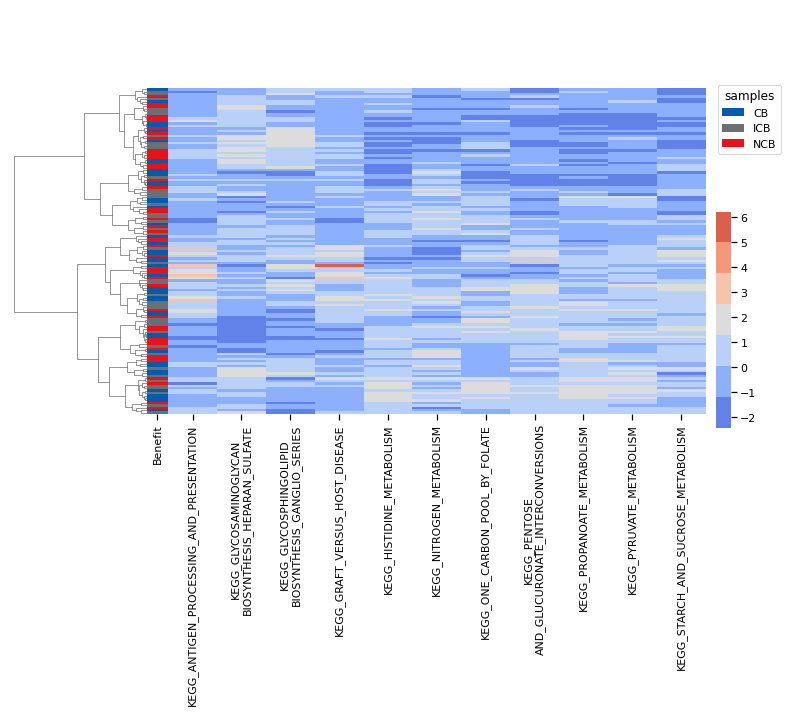

In [18]:
dc = {2:"#e40c69",1:"#2e3092",3:'#6d6e71'}
#####################################################################
df_aveplot = gscl.copy()[os_list[:1]+os_list[3:-4] + os_list[-3:-1]]
col_colors = gscl["Benefit"].copy().replace("ICB","#6d6e71")\
                    .replace("NCB","#E7131A").replace("CB","#005baa")
df_aveplot.columns = [secline(i) for i in df_aveplot.columns.tolist()]
df_aveplot.fillna(0,inplace=True)
#####################################################################


g1 = sns.clustermap(df_aveplot, cmap=sns.color_palette("coolwarm", 7),col_cluster=False,yticklabels=False,
               method="ward",metric="cosine",row_colors= col_colors,z_score=1)#,col_cluster=False)
plt.setp(g1.ax_heatmap.get_xticklabels(), rotation=90) 
ax = g1.ax_heatmap
ax.set_ylabel("")
g1.ax_cbar.set_position((1, .4, .02, .3))

dic = {"ICB":"#6d6e71","NCB":"#E7131A","CB":"#005baa"}

for label in ["CB","ICB","NCB"]:
    g1.ax_col_dendrogram.bar(0, 0, color=dic[label], label=label, linewidth=0)
l1 = g1.ax_col_dendrogram.legend(title='samples', loc="best", ncol=1, bbox_to_anchor=(1.15, 0.10))

plt.savefig(f"f5.{cate}_{pcc}_{path_topo}_{gr}_os.svg",dpi=600,bbox_inches='tight')
plt.show()
plt.close()

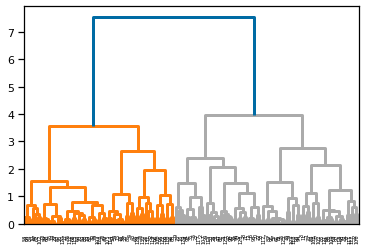

In [22]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy import stats

linkage_data = linkage(pdist(stats.zscore(df_aveplot), 'cosine'), method='ward', metric='euclidean')
dn = dendrogram(linkage_data)
plt.show() 

[2 2 2 2 1 2 2 2 2 2 1 2 2 1 1 1 2 1 1 1 1 2 2 1 2 2 1 1 2 1 2 2 1 2 2 2 1
 2 2 1 2 2 2 1 2 1 1 1 2 1 1 2 1 2 1 1 2 2 1 1 1 2 1 1 1 1 1 2 1 2 1 2 2 1
 1 2 2 2 2 2 2 2 1 2 1 2 1 1 1 2 2 2 2 2 2 1 1 2 2 1 1 2 1 1 2 1 2 2 2 2 1
 2 2 2 1 1 2 2 2 1 1 2 1 2 1 2 1 2 2 2 1 1 1]
0.00567691996843805
c1_CB: 27 c1_ICB: 22 c1_NCB: 24
c2_CB: 17 c2_ICB: 21 c2_NCB: 22


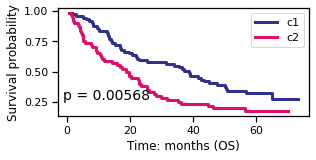

In [23]:
from scipy.cluster.hierarchy import fcluster
from sksurv.compare import compare_survival
import numpy as np

fl = fcluster(linkage_data,2,criterion='maxclust')
print(fl)

def swapPositions(lis):
    newlis = []
    for i in lis:
        if i == 1:
            newlis.append(2)
        if i == 2:
            newlis.append(1)
    return newlis


df_os["cres"] = fl
df_os["cres"] =swapPositions(fl)


y = df_os[["OS_CNSR","OS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")
group_indicator = df_os["cres"]
chi2, pvalue= compare_survival(y,group_indicator)
print(pvalue)


#OS survival analysis
%matplotlib inline
import matplotlib.pyplot as plt
from sksurv.nonparametric import kaplan_meier_estimator
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 2))
df_os["OS_CNSR"] = df_os["OS_CNSR"]==1

for i in set(fl):
    speci_df = df_os[df_os["cres"]==i]
    print(f"c{i}_CB:",speci_df["Benefit"].tolist().count("CB"),
         f"c{i}_ICB:",speci_df["Benefit"].tolist().count("ICB"),
         f"c{i}_NCB:",speci_df["Benefit"].tolist().count("NCB"),)
    time, survival_prob, conf_int = kaplan_meier_estimator(
        speci_df["OS_CNSR"], \
        speci_df["OS"], conf_type="log-log"
)
    plt.step(time, survival_prob, where="post", label=f"c{i}",color=dc[i])
    #plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")

ax.text(0.02, 0.25, "p = "+str(round(pvalue,5)), transform=ax.transAxes, fontsize=14,
        verticalalignment='top')

plt.ylabel("Survival probability")
plt.xlabel("Time: months (OS)")
plt.legend(loc="best")  
plt.savefig(f"f5.{cate}_{pcc}_{path_topo}_{gr}_os_onlyosscluster.svg",dpi=600,bbox_inches='tight')
plt.show()
plt.close()

In [25]:
pfs_list[:2]+pfs_list[3:]

['KEGG_APOPTOSIS',
 'KEGG_ERBB_SIGNALING_PATHWAY',
 'KEGG_NEUROACTIVE_LIGAND_RECEPTOR_INTERACTION',
 'KEGG_PYRUVATE_METABOLISM',
 'KEGG_TASTE_TRANSDUCTION']

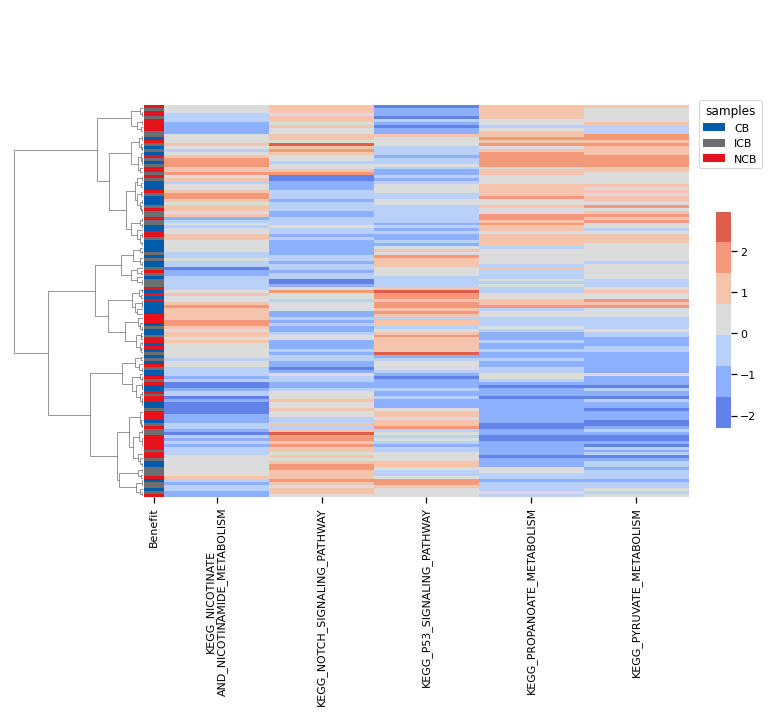

In [25]:
#####################################################################
df_aveplotpfs = df_os.set_index("index").copy()[pfs_list]
col_colors = df_os.set_index("index")["Benefit"].copy().replace("ICB","#6d6e71")\
                    .replace("NCB","#E7131A").replace("CB","#005baa")
df_aveplotpfs.columns = [secline(i) for i in df_aveplotpfs.columns.tolist()]
df_aveplotpfs.fillna(0,inplace=True)
#####################################################################

g1 = sns.clustermap(df_aveplotpfs, cmap=sns.color_palette("coolwarm", 7),col_cluster=False,yticklabels=False,
               method="ward",metric="cosine",row_colors= col_colors,z_score=1)#,col_cluster=False)
plt.setp(g1.ax_heatmap.get_xticklabels(), rotation=90) 
ax = g1.ax_heatmap
ax.set_ylabel("")
g1.ax_cbar.set_position((1, .4, .02, .3))

dic = {"ICB":"#6d6e71","NCB":"#E7131A","CB":"#005baa"}

for label in ["CB","ICB","NCB"]:
    g1.ax_col_dendrogram.bar(0, 0, color=dic[label], label=label, linewidth=0)
l1 = g1.ax_col_dendrogram.legend(title='samples', loc="best", ncol=1, bbox_to_anchor=(1.15, 0.10))

plt.savefig(f"f5.{cate}_{pcc}_{path_topo}_{gr}_pfs.svg",dpi=600,bbox_inches='tight')
plt.show()
plt.close()

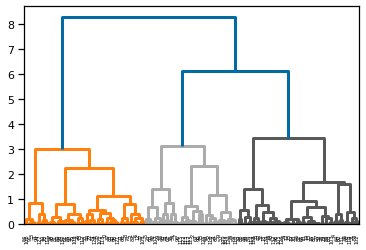

In [30]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy import stats

linkage_data = linkage(pdist(stats.zscore(df_aveplotpfs), 'cosine'), method='ward', metric='euclidean')
dn = dendrogram(linkage_data)
plt.show() 

fl = fcluster(linkage_data,2,criterion='maxclust')

df_os["cres"] = fl
#df_os["cres"] =swapPositions(fl)

0.5398161206928733
c1_CB: 14 c1_ICB: 17 c1_NCB: 17
c2_CB: 30 c2_ICB: 26 c2_NCB: 29


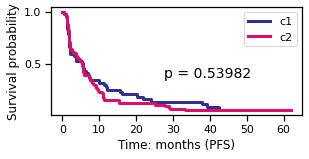

In [31]:
y = df_os[["PFS_CNSR","PFS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")
group_indicator = df_os["cres"]
chi2, pvalue= compare_survival(y,group_indicator)
print(pvalue)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4.5, 2))
df_os["PFS_CNSR"] = df_os["PFS_CNSR"]==1

for i in set(fl):
    speci_df = df_os[df_os["cres"]==i]
    print(f"c{i}_CB:",speci_df["Benefit"].tolist().count("CB"),
         f"c{i}_ICB:",speci_df["Benefit"].tolist().count("ICB"),
         f"c{i}_NCB:",speci_df["Benefit"].tolist().count("NCB"),)
    time, survival_prob, conf_int = kaplan_meier_estimator(
        speci_df["PFS_CNSR"], \
        speci_df["PFS"], conf_type="log-log"
)
    plt.step(time, survival_prob, where="post", label=f"c{i}",color=dc[i])
    #plt.fill_between(time, conf_int[0], conf_int[1], alpha=0.25, step="post")

ax.text(0.45, 0.45, "p = "+str(round(pvalue,5)), transform=ax.transAxes, fontsize=14,
        verticalalignment='top')


plt.ylabel("Survival probability")
plt.xlabel("Time: months (PFS)")
plt.legend(loc="best")  
plt.savefig(f"f5.{cate}_{pcc}_{path_topo}_{gr}_pfs_onlypfscluster.svg",dpi=600,bbox_inches='tight')
plt.show()
plt.close()

from scipy.cluster.hierarchy import fcluster

fl = fcluster(linkage_data,2,criterion='maxclust')
print(fl)
df_os["cres"] = fl
#df_os["cres"] = [1 if i != 2 else i for i in fl ]
#print(df_sns["cres"]!=3)
set(df_os["cres"])

from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons
from sksurv.compare import compare_survival
import numpy as np
pdf1 = df_os.copy()
print(pdf1.shape)
y = df_os[["OS_CNSR","OS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")

#df_os_fl[df_os_fl[tar]>df_os[tar].quantile(0.65)] = "higher"
group_indicator = pdf1["cres"]
print(len(group_indicator))
chi2, pvalue= compare_survival(y,group_indicator)
print(pvalue)

ix = pdf1['cres'] == 2

ax = plt.subplot(111)

kmf_control = KaplanMeierFitter()
#print(pdf1.loc[ix]["OS"])
ax = kmf_control.fit(pdf1.loc[ix]["OS"], pdf1.loc[ix]["OS_CNSR"], label='c2').plot_survival_function(ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(pdf1.loc[~ix]["OS"], pdf1.loc[~ix]["OS_CNSR"], label='c1&cn').plot_survival_function(ax=ax)


from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_exp, kmf_control, ax=ax)

ax.text(0.7, 0.35, "logrank test\np value: "+str(round(pvalue,5)), transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
plt.title("OS")
plt.tight_layout()

from lifelines import KaplanMeierFitter
from lifelines.datasets import load_waltons
from sksurv.compare import compare_survival
import numpy as np
pdf1 = df_os.copy()
print(pdf1.shape)
y = df_os[["PFS_CNSR","PFS"]].values
y = np.array([ (i[0],i[1]) for i in y],dtype="bool,f")

#df_os_fl[df_os_fl[tar]>df_os[tar].quantile(0.65)] = "higher"
group_indicator = pdf1["cres"]
print(len(group_indicator))
chi2, pvalue= compare_survival(y,group_indicator)
print(pvalue)

ix = pdf1['cres'] == 2

ax = plt.subplot(111)

kmf_control = KaplanMeierFitter()
ax = kmf_control.fit(pdf1.loc[ix]["PFS"], pdf1.loc[ix]["PFS_CNSR"], label='c2').plot_survival_function(ax=ax)

kmf_exp = KaplanMeierFitter()
ax = kmf_exp.fit(pdf1.loc[~ix]["PFS"], pdf1.loc[~ix]["OS_CNSR"], label='c1&cn').plot_survival_function(ax=ax)


from lifelines.plotting import add_at_risk_counts
add_at_risk_counts(kmf_exp, kmf_control, ax=ax)

ax.text(0.7, 0.35, "logrank test\np value: "+str(round(pvalue,5)), transform=ax.transAxes, fontsize=14,
        verticalalignment='top')
plt.title("PFS")
plt.tight_layout()